**Import packages**

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

**Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/SocialMediaAnalyticsProject/facebook_combined.txt"

facebook = pd.read_csv(
    file_path,
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

start_node  end_node
0               0         1
1               0         2
2               0         3
3               0         4
4               0         5
...           ...       ...
88229        4026      4030
88230        4027      4031
88231        4027      4032
88232        4027      4038
88233        4031      4038

[88234 rows x 2 columns]

**The graph is created from the facebook dataframe of the edges:**

In [ ]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

**Visualizing the graph**

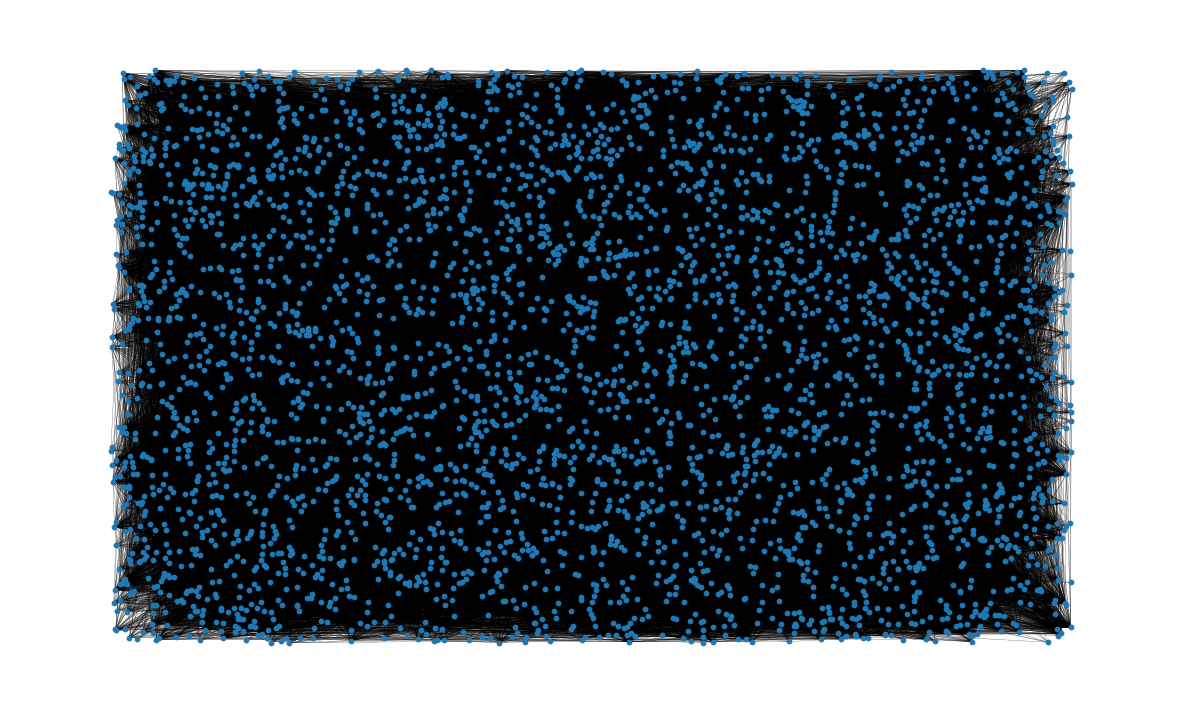

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

**Using spring_layout to show above graph in better way (Also limiting iterations)**

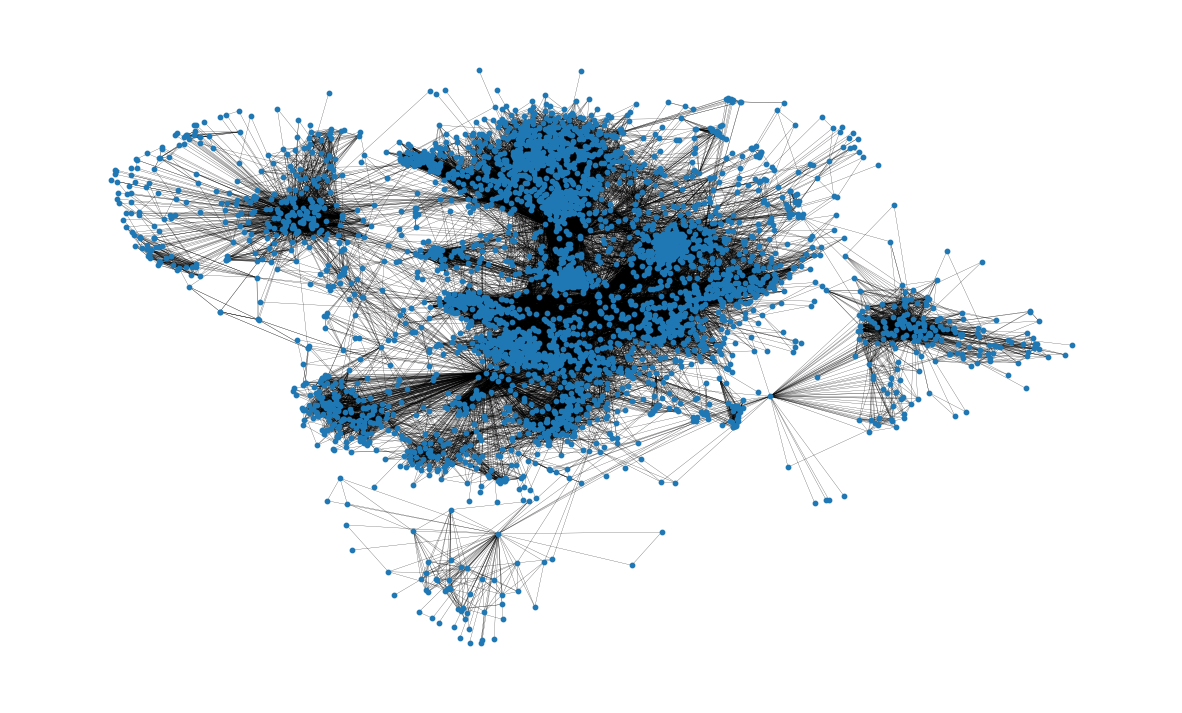

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

**Basic topological attributes**

In [ ]:
G.number_of_nodes()

4039

**Total number of edges:**

In [ ]:
G.number_of_edges()

88234

**The average degree of a node can be seen.**

In [ ]:
np.mean([d for _, d in G.degree()])

43.69101262688784

**The shortest path length for all pairs of nodes in the network**

In [ ]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [ ]:
shortest_path_lengths[0][42]  # Length of shortest path between nodes 0 and 42

1

In [ ]:
# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

8

In [ ]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

Text(0, 0.5, 'Frequency (%)')

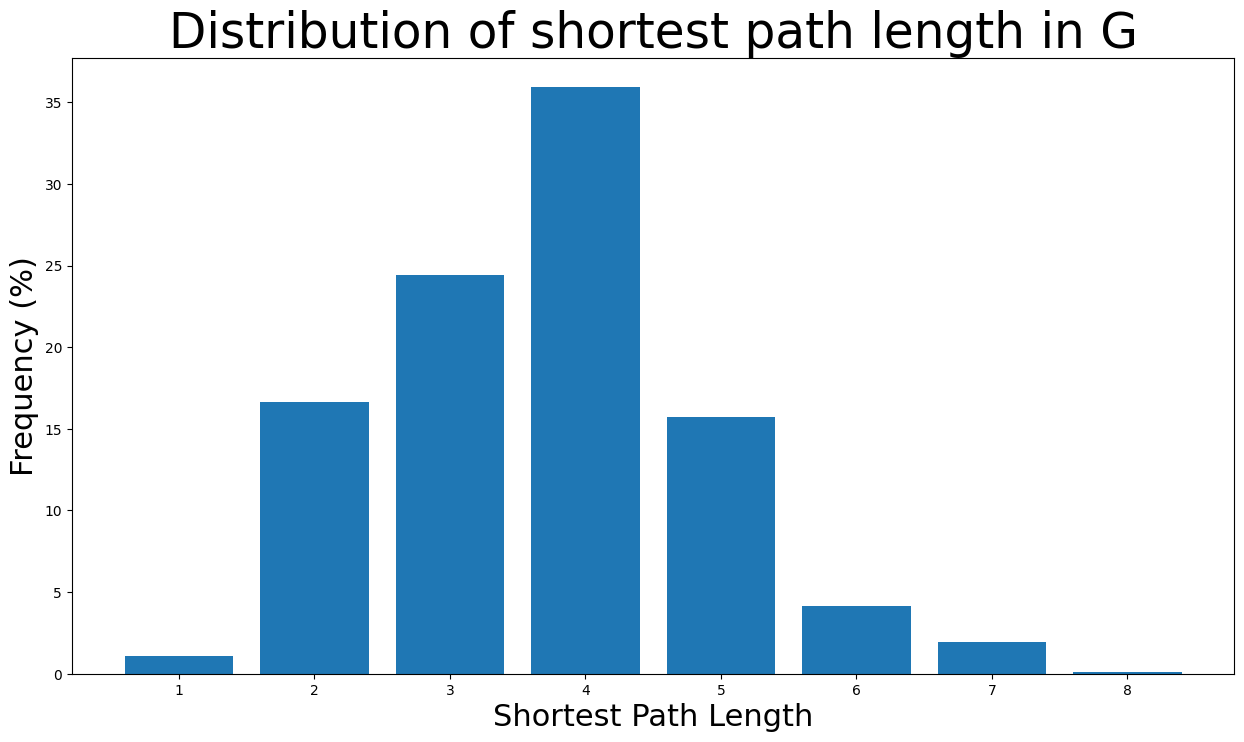

In [ ]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [ ]:
nx.density(G)

0.010819963503439287

In [ ]:
nx.number_connected_components(G)

1

**Centrality measures**

In [ ]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

**The number of neighbors for the nodes with the highest degree centralities**

In [ ]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254)]

**Degree Centrality Histogram - distribution of degree centralities**

Text(0, 0.5, 'Counts')

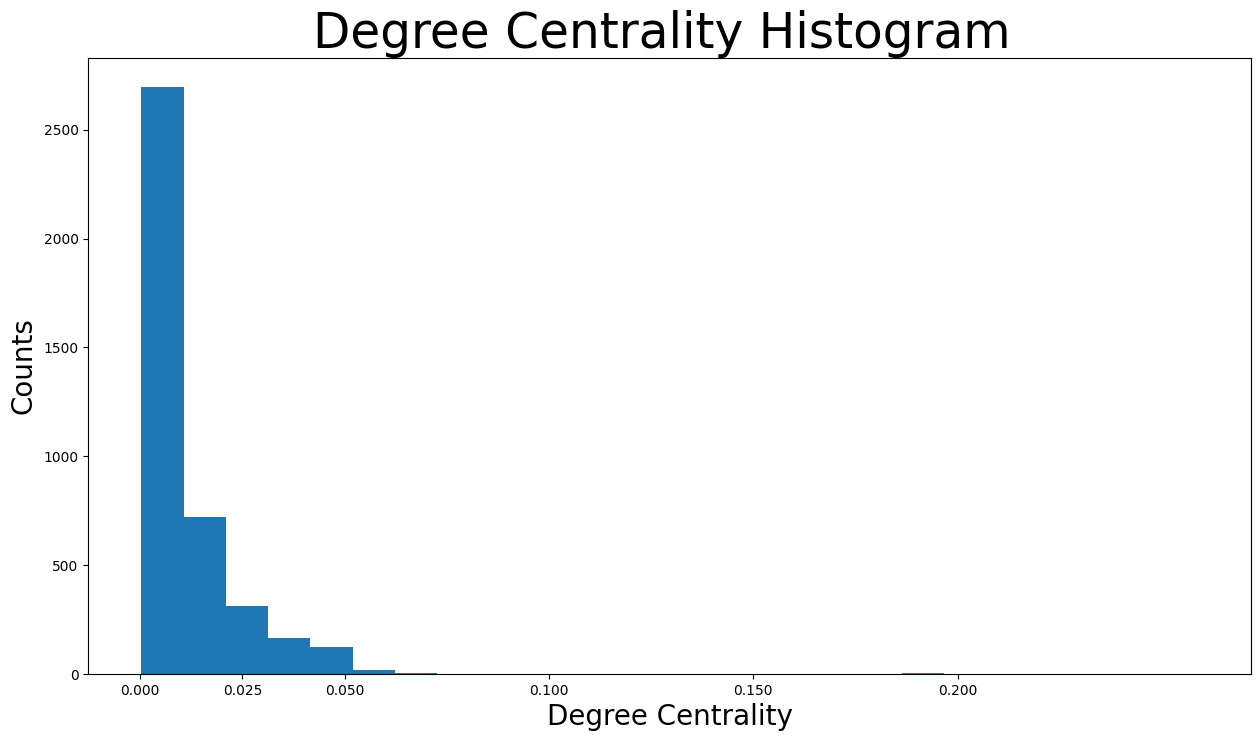

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

**The users with highest degree centralities from the size of their nodes**

(-0.9991901686787605,
 1.1078369787335396,
 -1.164599340558052,
 0.7322121077775956)

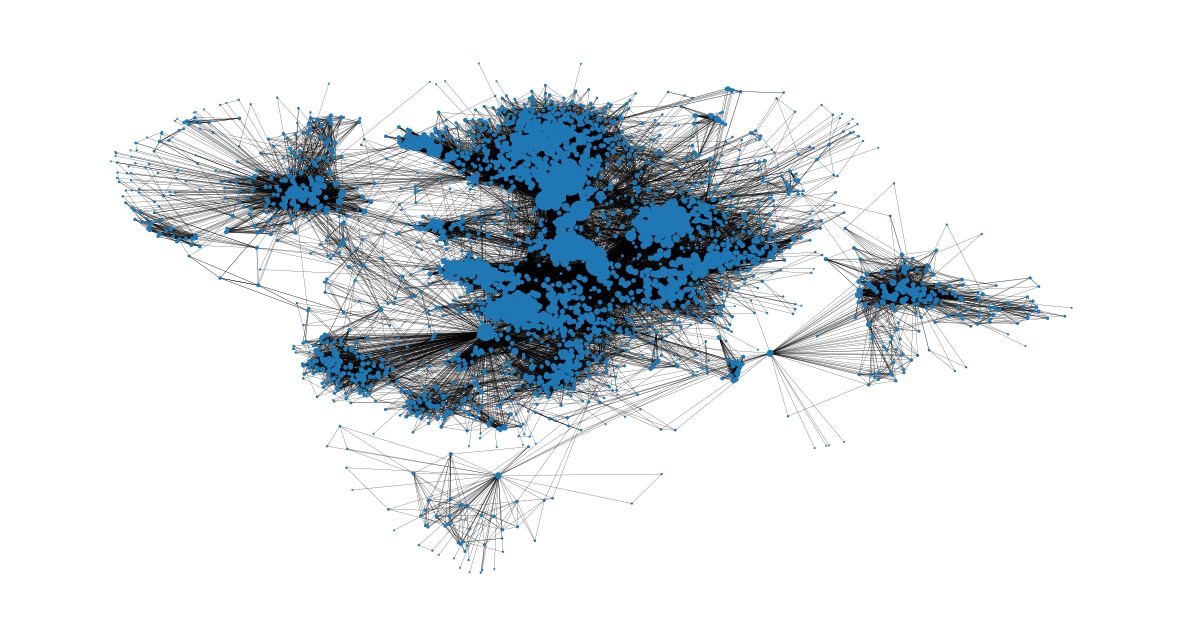

In [ ]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

**Betweenness Centrality**

**The nodes with the highest betweenness centralities will be calculated and shown with their centrality values**

In [ ]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215)]

**The distribution of betweenness centralities will be plotted**

Text(0, 0.5, 'Counts')

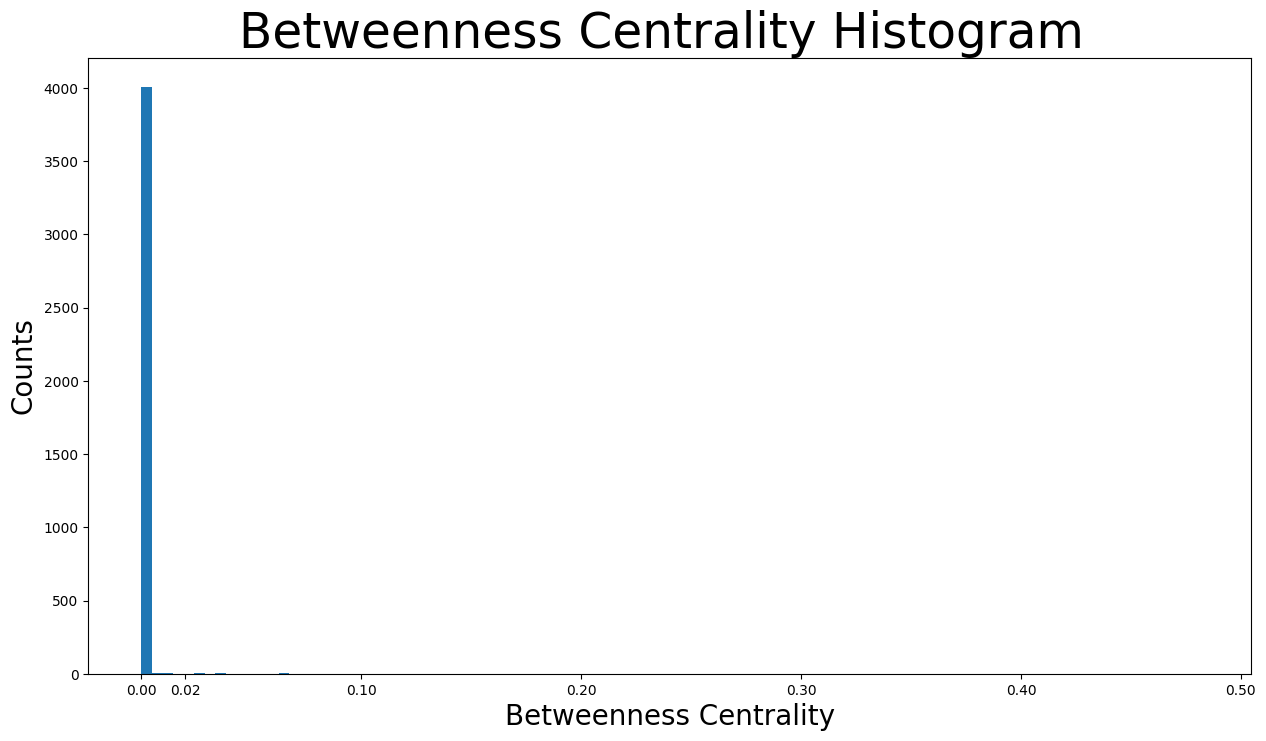

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

**The nodes with the highest betweenness centralities and where they are located in the network**

(-0.9991901686787605,
 1.1078369787335396,
 -1.164599340558052,
 0.7322121077775956)

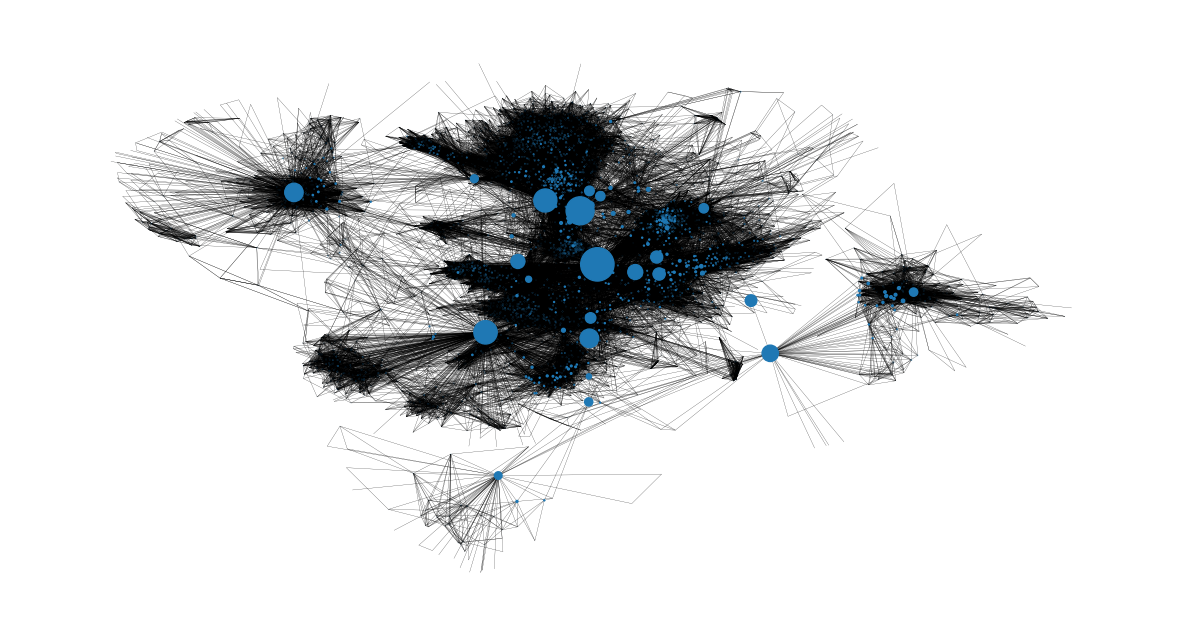

In [ ]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

**Closeness Centrality**

**The nodes with the highest closeness centralities**

In [ ]:
closeness_centrality = nx.centrality.closeness_centrality(
    G
)  # save results in a variable to use again
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739)]

**The average distance of a particular node
 to any other node**

In [ ]:
1 / closeness_centrality[107]

2.1753343239227343

**The distribution of the closeness centralities**

Text(0, 0.5, 'Counts')

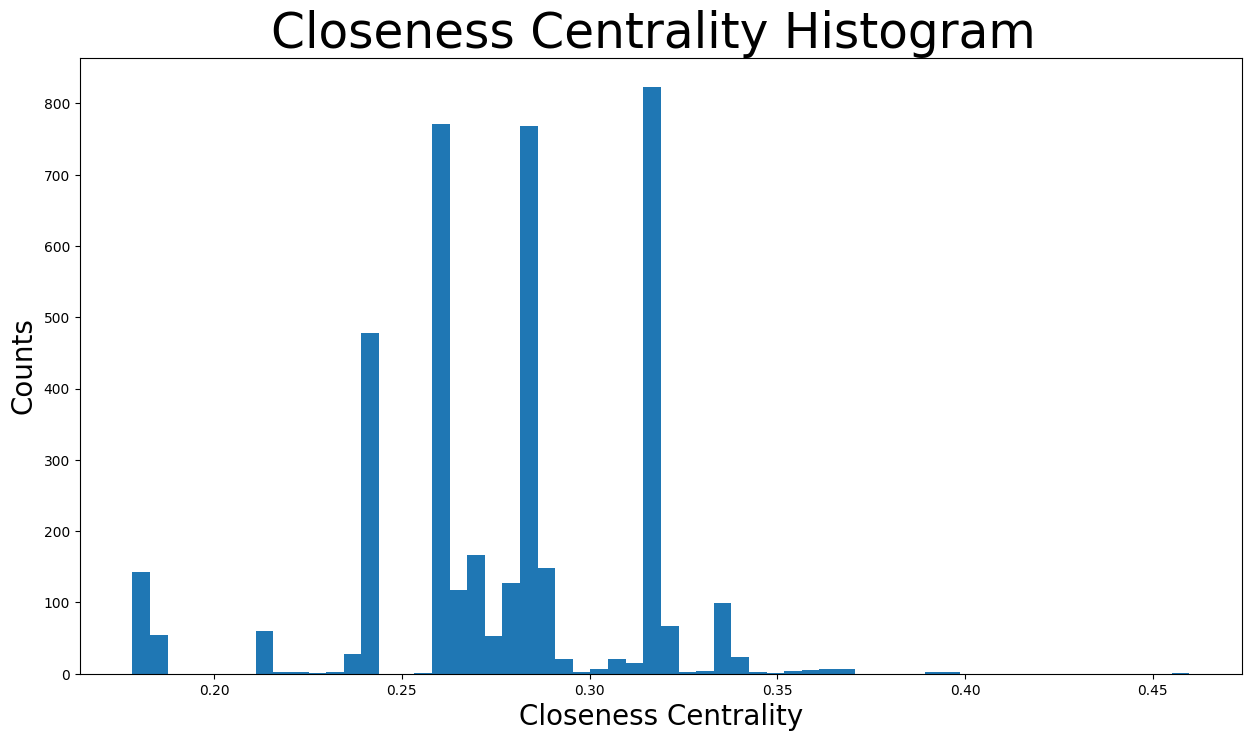

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

**The closeness centralities are distributed**

(-0.9991901686787605,
 1.1078369787335396,
 -1.164599340558052,
 0.7322121077775956)

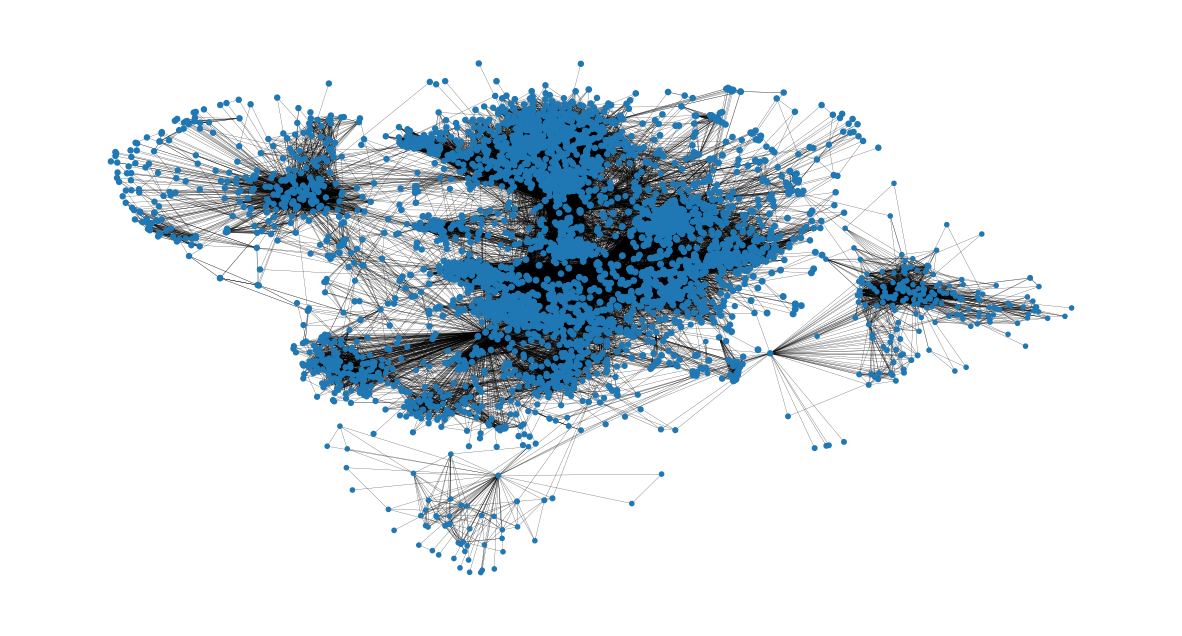

In [ ]:
node_size = [
    v * 50 for v in closeness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

**Eigenvector Centrality**

In [ ]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(
    G
)  # save results in a variable to use again
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(1912, 0.09540696149067629),
 (2266, 0.08698327767886552),
 (2206, 0.08605239270584342),
 (2233, 0.08517340912756598),
 (2464, 0.08427877475676092),
 (2142, 0.08419311897991795),
 (2218, 0.0841557356805503),
 (2078, 0.08413617041724977),
 (2123, 0.08367141238206224),
 (1993, 0.0835324284081597)]

**Checking if those nodes are connected to the most important node 1912
, the hypothesis is correct:**


In [ ]:
high_eigenvector_centralities = (
    sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
)[
    1:10
]  # 2nd to 10th nodes with heighest eigenvector centralities
high_eigenvector_nodes = [
    tuple[0] for tuple in high_eigenvector_centralities
]  # set list as [2266, 2206, 2233, 2464, 2142, 2218, 2078, 2123, 1993]
neighbors_1912 = [n for n in G.neighbors(1912)]  # list with all nodes connected to 1912
all(
    item in neighbors_1912 for item in high_eigenvector_nodes
)  # check if items in list high_eigenvector_nodes exist in list neighbors_1912

True

**Let’s check the distribution of the eigenvector centralities**

Text(0, 0.5, 'Counts')

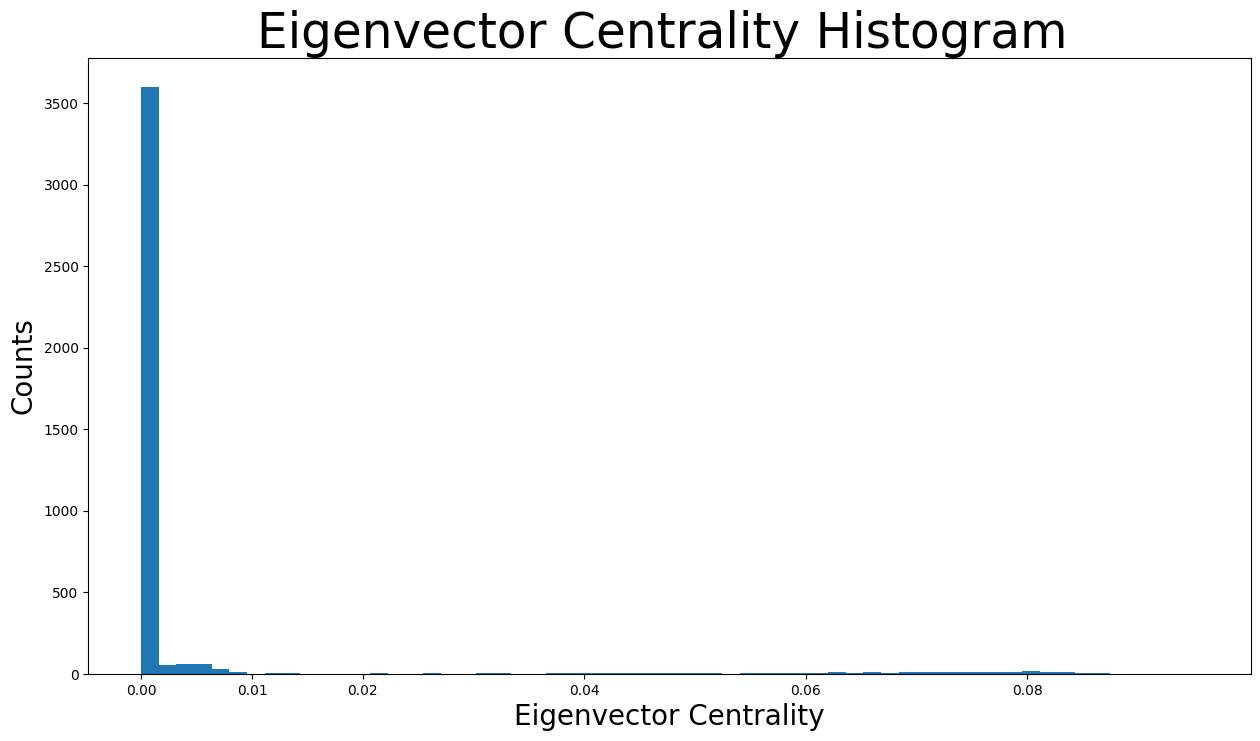

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

**Identify the eigenvector centralities of nodes based on their size in the following representation**

(-0.9991901686787605,
 1.1078369787335396,
 -1.164599340558052,
 0.7322121077775956)

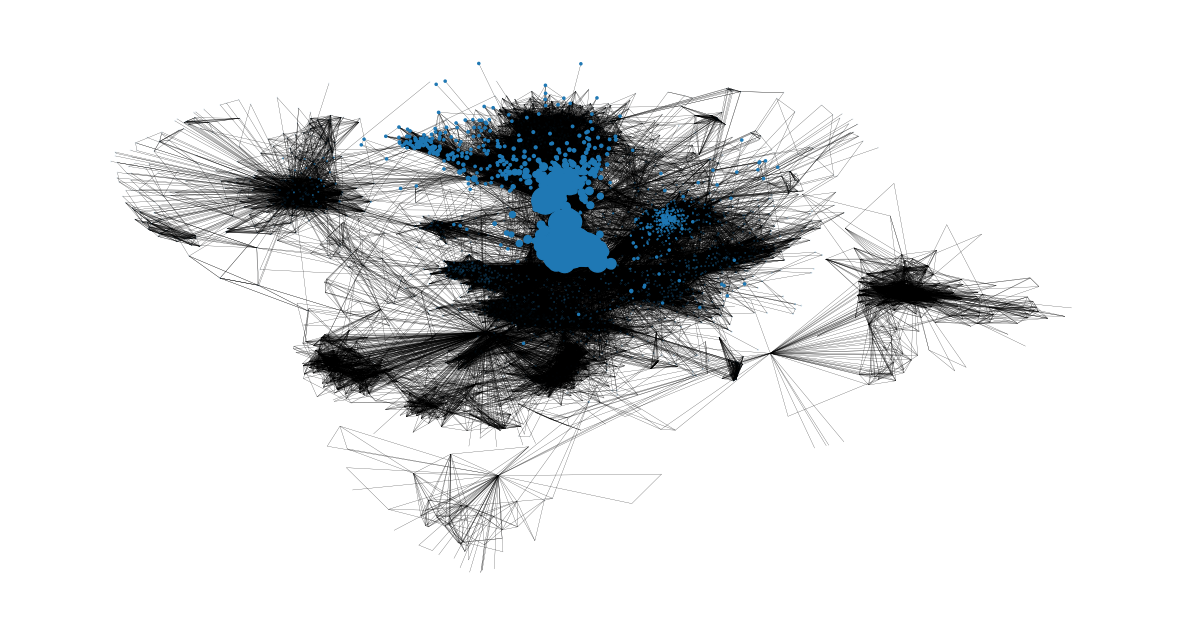

In [ ]:
node_size = [
    v * 4000 for v in eigenvector_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

**Network Communities**

In [ ]:
colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

44

In details, 44 communities were detected

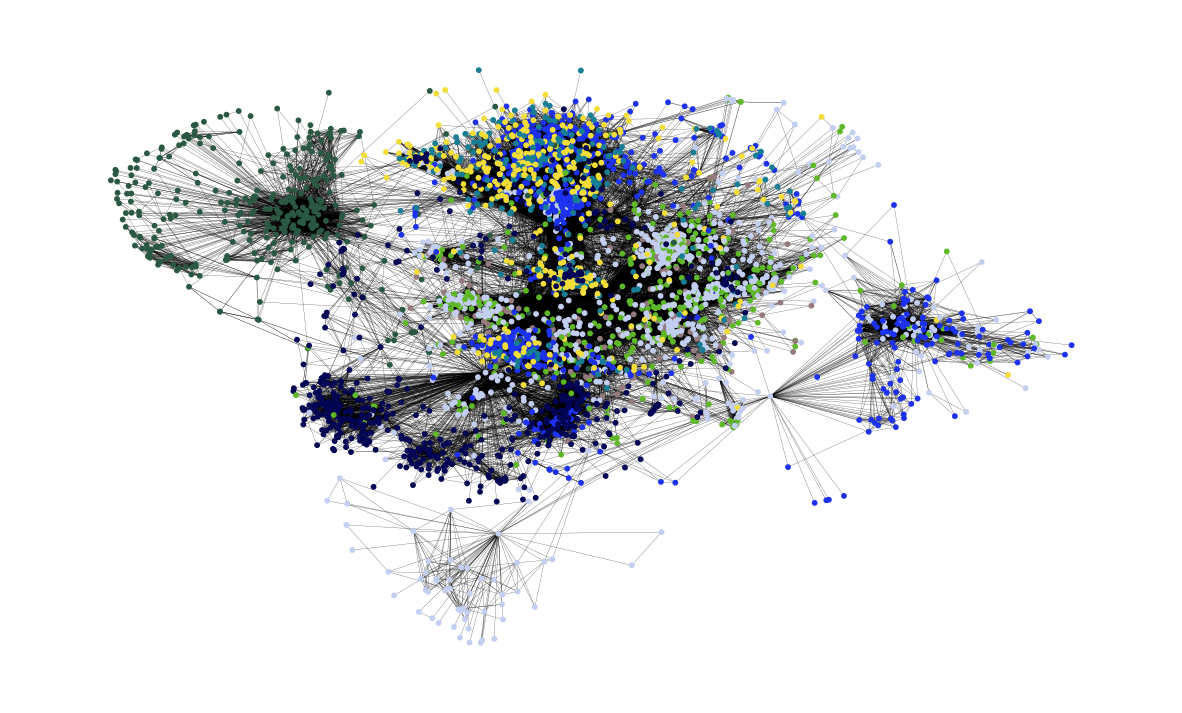

In [ ]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)

**The communities will be iterated through and a colors list will be created to contain the same color for nodes that belong to the same community.**

In [ ]:
colors = ["" for x in range(G.number_of_nodes())]
for com in nx.community.asyn_fluidc(G, 10, seed=0):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[node] = color

**Now the communities are shown in the graph. Again, each community is depicted with a different color:**

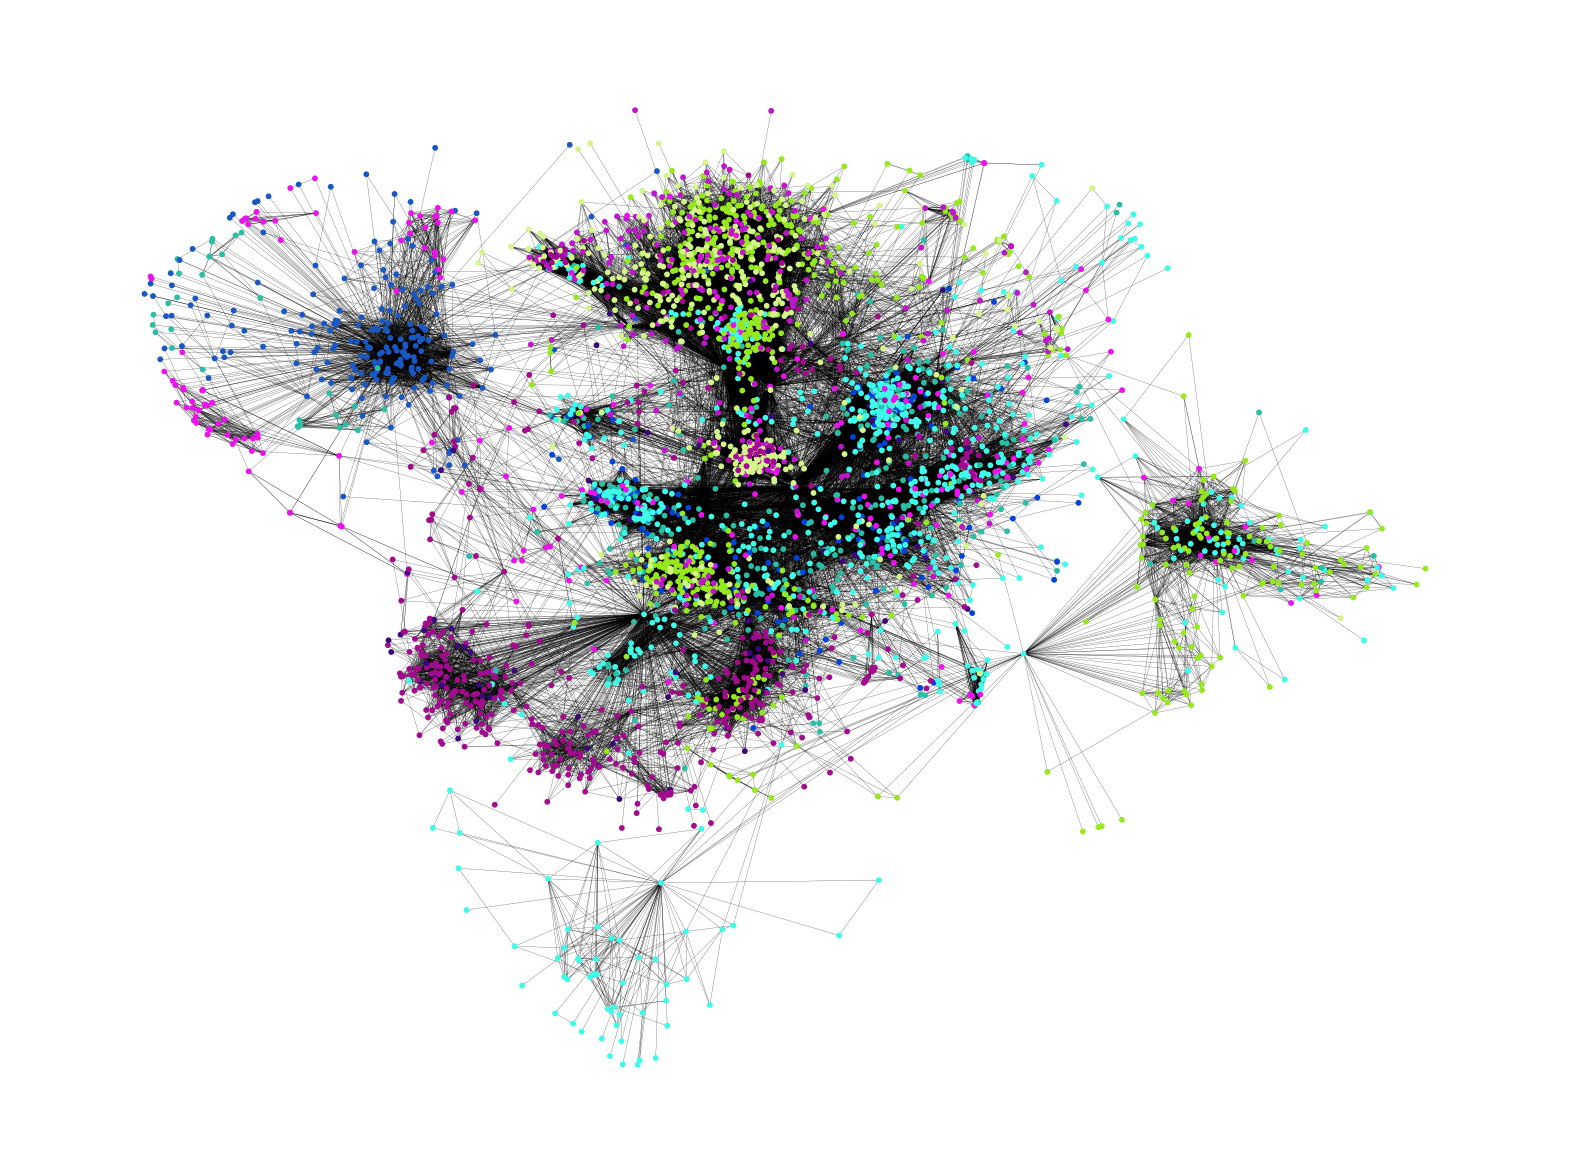

In [ ]:
plt.figure(figsize=(20, 15))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)